# Pre-processing Utah Department of Natural Resources Regulatory data for WaDE upload.
- Purpose:  To preprocess the data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/Utah/Regulatory/Regulatory_DNR" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/Utah/Regulatory/Regulatory_DNR


## Regulatory Area Data #1 - WaterRightAreasServiceView

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/WaterRightAreasServiceView.zip"
dfin1 = gpd.read_file(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "re1" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/WaterRightAreasServiceView.zip', compression=dict(method='zip', archive_name='WaterRightAreasServiceView.csv'), index=False)

print(len(dfin1))
dfin1.head()

51


,OBJECTID,REGIONAL_O,AREA_CODE,Office,Address,City,Phone,Link,Shape__Are,Shape__Len,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,260,Cedar,85,Southwestern Regional Office (CEDAR CITY),585 North Main Street,"Cedar City, Utah 84721-0506",(435) 586-4231,http://www.waterrights.utah.gov/wrinfo/policy/...,1635481661.21000,219386.06823,2.24289,0.16602,"POLYGON ((-112.38896 37.50270, -112.38838 37.5...",re10
1,261,Cedar,81,Southwestern Regional Office (CEDAR CITY),585 North Main Street,"Cedar City, Utah 84721-0506",(435) 586-4231,http://www.waterrights.utah.gov/wrinfo/policy/...,7392180975.15000,478842.85667,4.91476,0.75072,"POLYGON ((-114.05216 37.59699, -114.05188 37.5...",re11
2,262,Cedar,89,Southwestern Regional Office (CEDAR CITY),585 North Main Street,"Cedar City, Utah 84721-0506",(435) 586-4231,http://www.waterrights.utah.gov/wrinfo/policy/...,6074175803.41000,417705.45685,4.31382,0.61771,"POLYGON ((-112.03554 37.73858, -112.03515 37.7...",re12
3,263,Price,09,Southeastern Regional Office (PRICE),319 North Carbonville Road,"Price, Utah 84501",(435) 613-3750,http://www.waterrights.utah.gov/wrinfo/policy/...,11599826702.40000,654296.55746,6.81080,1.18019,"POLYGON ((-109.30904 37.97470, -109.30856 37.9...",re13
4,264,Cedar,73,Southwestern Regional Office (CEDAR CITY),585 North Main Street,"Cedar City, Utah 84721-0506",(435) 586-4231,http://www.waterrights.utah.gov/wrinfo/policy/...,1535838365.44000,246005.70335,2.48746,0.15709,"POLYGON ((-112.91952 38.13192, -112.91867 38.1...",re14


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "12/10/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "UTre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = "WaDE Blank"
df['in_ReportingUnitNativeID'] = "utr1" + dfin1['AREA_CODE'].astype(str).str.strip()
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Water Right Areas"
df['in_ReportingUnitUpdateDate'] = "5/31/2022"
df['in_StateCV'] = "UT"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = dfin1['Office']
df['in_RegulatoryDescription'] = "Water Right Areas are administrative boundaries based primarily on surface drainage areas. Different water right areas can have different appropriation policies and can be administered by different regional offices."
df['in_RegulatoryName'] = "WaDE Blank"
df['in_RegulatoryOverlayNativeID'] = "utr1" + dfin1['AREA_CODE'].astype(str).str.strip()
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = dfin1['Link']
df['in_StatutoryEffectiveDate'] = "12/10/2023"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Water Right Areas"
df['in_WaterSourceTypeCV'] = "Surface Water and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

51


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re10,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr185,,Water Right Areas,5/31/2022,UT,,Southwestern Regional Office (CEDAR CITY),Water Right Areas are administrative boundarie...,WaDE Blank,utr185,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Water Right Areas,Surface Water and Groundwater
1,re11,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr181,,Water Right Areas,5/31/2022,UT,,Southwestern Regional Office (CEDAR CITY),Water Right Areas are administrative boundarie...,WaDE Blank,utr181,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Water Right Areas,Surface Water and Groundwater
2,re12,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr189,,Water Right Areas,5/31/2022,UT,,Southwestern Regional Office (CEDAR CITY),Water Right Areas are administrative boundarie...,WaDE Blank,utr189,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Water Right Areas,Surface Water and Groundwater
3,re13,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr109,,Water Right Areas,5/31/2022,UT,,Southeastern Regional Office (PRICE),Water Right Areas are administrative boundarie...,WaDE Blank,utr109,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Water Right Areas,Surface Water and Groundwater
4,re14,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr173,,Water Right Areas,5/31/2022,UT,,Southwestern Regional Office (CEDAR CITY),Water Right Areas are administrative boundarie...,WaDE Blank,utr173,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Water Right Areas,Surface Water and Groundwater


## Regulatory Area #2 - AreasOpenToLimitedAppropriation

In [5]:
# Input File
inputFile = "RawInputData/shapefiles/AreasOpenToLimitedAppropriation.zip"
dfin2 = gpd.read_file(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin2:
    dfin2['WaDEUUID'] = "re2" + dfin2.index.astype(str)
    dfin2.to_csv('RawInputData/AreasOpenToLimitedAppropriation.zip', compression=dict(method='zip', archive_name='AreasOpenToLimitedAppropriation.csv'), index=False)

print(len(dfin2))
dfin2.head()

7


,REGIONAL_O,AREA_CODE,Office,Address,City,Phone,Link,Shape_Leng,Status,Shape_Le_1,Shape_Area,geometry,WaDEUUID
0,Logan,21,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,122055.18857,Small,1.28645,0.07148,"POLYGON ((-110.96823 40.99784, -110.89120 40.9...",re20
1,Weber,31,Weber River/Western Regional Office (SLC),"1594 West North Temple, Suite 220","SLC, Utah 84114-6300",(801) 538-7240,http://www.waterrights.utah.gov/wrinfo/policy/...,209439.55495,Small,1.68763,0.06325,"POLYGON ((-111.95861 40.90017, -111.95862 40.9...",re21
2,Logan,21,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,65411.55243,Small,0.64472,0.01169,"POLYGON ((-111.04673 41.25163, -111.04674 41.2...",re22
3,Logan,23,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,299850.11154,Small,3.06165,0.30407,"POLYGON ((-111.04676 41.99997, -111.04694 41.9...",re23
4,Logan,25,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,285776.77277,Small,3.01955,0.32789,"POLYGON ((-112.12584 41.99755, -112.10940 41.9...",re24


In [6]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin2['WaDEUUID']

# Date Info
df['in_Date'] = "12/10/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "UTre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = "WaDE Blank"
df['in_ReportingUnitNativeID'] = "utr2" + dfin2['AREA_CODE'].astype(str).str.strip()
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Areas Open to Limited Appropriation"
df['in_ReportingUnitUpdateDate'] = "5/31/2022"
df['in_StateCV'] = "UT"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = dfin2['Office']
df['in_RegulatoryDescription'] = "The following are excepted from the effect of this proclamation: 1) applications for non-consumptive uses; 2) applications that include a mitigation plan to offset depletion; 3) applications for small amounts of water, as defined in Utah Code 73-3-5.6, that comply with State Engineer basin policies. All such applications remain subject to all applicable requirements of state law."
df['in_RegulatoryName'] = "WaDE Blank"
df['in_RegulatoryOverlayNativeID'] = "utr2" + dfin2['AREA_CODE'].astype(str).str.strip()
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = dfin2['Link']
df['in_StatutoryEffectiveDate'] = "12/10/2023"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Areas Open to Limited Appropriation"
df['in_WaterSourceTypeCV'] = "Surface Water and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf2 = df.copy()
print(len(outdf2))
outdf2.head()

7


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re20,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr221,,Areas Open to Limited Appropriation,5/31/2022,UT,,Northern Regional Office (LOGAN),The following are excepted from the effect of ...,WaDE Blank,utr221,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Areas Open to Limited Appropriation,Surface Water and Groundwater
1,re21,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr231,,Areas Open to Limited Appropriation,5/31/2022,UT,,Weber River/Western Regional Office (SLC),The following are excepted from the effect of ...,WaDE Blank,utr231,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Areas Open to Limited Appropriation,Surface Water and Groundwater
2,re22,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr221,,Areas Open to Limited Appropriation,5/31/2022,UT,,Northern Regional Office (LOGAN),The following are excepted from the effect of ...,WaDE Blank,utr221,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Areas Open to Limited Appropriation,Surface Water and Groundwater
3,re23,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr223,,Areas Open to Limited Appropriation,5/31/2022,UT,,Northern Regional Office (LOGAN),The following are excepted from the effect of ...,WaDE Blank,utr223,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Areas Open to Limited Appropriation,Surface Water and Groundwater
4,re24,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr225,,Areas Open to Limited Appropriation,5/31/2022,UT,,Northern Regional Office (LOGAN),The following are excepted from the effect of ...,WaDE Blank,utr225,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Areas Open to Limited Appropriation,Surface Water and Groundwater


## Regulatory Area #3 - BasinsClosedToNewAppropriations

In [7]:
# Input File
inputFile = "RawInputData/shapefiles/BasinsClosedToNewAppropriations.zip"
dfin3 = gpd.read_file(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin3:
    dfin3['WaDEUUID'] = "re3" + dfin3.index.astype(str)
    dfin3.to_csv('RawInputData/BasinsClosedToNewAppropriations.zip', compression=dict(method='zip', archive_name='BasinsClosedToNewAppropriations.csv'), index=False)

print(len(dfin3))
dfin3.head()

5


,REGIONAL_O,AREA_CODE,Office,Address,City,Phone,Link,Shape_Leng,Status,Shape_Le_1,Shape_Area,geometry,WaDEUUID
0,Jordan River Basin,53,Utah Lake/Jordan River Regional Office (SLC),"1594 West North Temple, Suite 220","SLC, Utah 84114-6300",(801) 538-7240,http://www.waterrights.utah.gov/wrinfo/policy/...,258872.90020,Small,6.74573,1.02125,"POLYGON ((-111.73892 40.86117, -111.73881 40.8...",re30
1,Bear River Basin,21,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,122055.18857,Closed,7.10444,0.90675,"MULTIPOLYGON (((-110.96823 40.99784, -110.8912...",re31
2,Davis County Basin,31,Weber River/Western Regional Office (SLC),"1594 West North Temple, Suite 220","SLC, Utah 84114-6300",(801) 538-7240,http://www.waterrights.utah.gov/wrinfo/policy/...,209439.55495,Small,1.68763,0.06325,"POLYGON ((-112.16904 41.15294, -112.12580 41.1...",re32
3,Weber River Basin,35,Weber River/Western Regional Office (SLC),"1594 West North Temple, Suite 220","SLC, Utah 84114-6300",(801) 538-7240,http://www.waterrights.utah.gov/wrinfo/policy/...,537830.32487,Closed,5.31547,0.60364,"POLYGON ((-112.13950 41.33653, -112.12576 41.3...",re33
4,,21,,,,,,0.00000,,6.40479,0.61146,"POLYGON ((-112.16904 41.15294, -112.16937 41.1...",re34


In [8]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin3['WaDEUUID']

# Date Info
df['in_Date'] = "12/10/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "UTre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = "WaDE Blank"
df['in_ReportingUnitNativeID'] = "utr3" + dfin3['AREA_CODE'].astype(str).str.strip()
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Basins Closed to New Appropriations"
df['in_ReportingUnitUpdateDate'] = "5/31/2022"
df['in_StateCV'] = "UT"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = dfin3['Office']
df['in_RegulatoryDescription'] = "Basin closed to new appropriations."
df['in_RegulatoryName'] = "WaDE Blank"
df['in_RegulatoryOverlayNativeID'] = "utr3" + dfin3['AREA_CODE'].astype(str).str.strip()
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = dfin3['Link']
df['in_StatutoryEffectiveDate'] = "12/10/2023"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Basins Closed to New Appropriations"
df['in_WaterSourceTypeCV'] = "Surface Water and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf3 = df.copy()
print(len(outdf3))
outdf3.head()

5


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re30,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr353,,Basins Closed to New Appropriations,5/31/2022,UT,,Utah Lake/Jordan River Regional Office (SLC),Basin closed to new appropriations.,WaDE Blank,utr353,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Basins Closed to New Appropriations,Surface Water and Groundwater
1,re31,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr321,,Basins Closed to New Appropriations,5/31/2022,UT,,Northern Regional Office (LOGAN),Basin closed to new appropriations.,WaDE Blank,utr321,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Basins Closed to New Appropriations,Surface Water and Groundwater
2,re32,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr331,,Basins Closed to New Appropriations,5/31/2022,UT,,Weber River/Western Regional Office (SLC),Basin closed to new appropriations.,WaDE Blank,utr331,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Basins Closed to New Appropriations,Surface Water and Groundwater
3,re33,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr335,,Basins Closed to New Appropriations,5/31/2022,UT,,Weber River/Western Regional Office (SLC),Basin closed to new appropriations.,WaDE Blank,utr335,Active,,http://www.waterrights.utah.gov/wrinfo/policy/...,12/10/2023,,Basins Closed to New Appropriations,Surface Water and Groundwater
4,re34,12/10/2023,2023,UTre_O1,4326,WaDE Blank,utr321,,Basins Closed to New Appropriations,5/31/2022,UT,,,Basin closed to new appropriations.,WaDE Blank,utr321,Active,,,12/10/2023,,Basins Closed to New Appropriations,Surface Water and Groundwater


## Concatenate DataFrames together

In [9]:
# Concatenate dataframes
frames = [outdf1, outdf2, outdf3] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

63


## Clean Data / data types

In [10]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [11]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['WaDE Blank'], dtype=object)

In [12]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Water Right Areas are administrative boundaries based primarily on surface drainage areas. Different water right areas can have different appropriation policies and can be administered by different regional offices.',
       'The following are excepted from the effect of this proclamation: 1) applications for non-consumptive uses; 2) applications that include a mitigation plan to offset depletion; 3) applications for small amounts of water, as defined in Utah Code 73-3-5.6, that comply with State Engineer basin policies. All such applications remain subject to all applicable requirements of state law.',
       'Basin closed to new appropriations.'], dtype=object)

In [13]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['WaDE Blank'], dtype=object)

In [14]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['2023-12-10 00:00:00']
Length: 1, dtype: datetime64[ns]

# Shapefile Data
- For attaching geometry to reporting unit info.

#### Regulatory Area #1 shapefile info

In [15]:
# use sampe input file as above...
gdfin1 = dfin1.copy()

gdfin1['geometry'] = gdfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection
print(len(gdfin1))
gdfin1.head()

51


,OBJECTID,REGIONAL_O,AREA_CODE,Office,Address,City,Phone,Link,Shape__Are,Shape__Len,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,260,Cedar,85,Southwestern Regional Office (CEDAR CITY),585 North Main Street,"Cedar City, Utah 84721-0506",(435) 586-4231,http://www.waterrights.utah.gov/wrinfo/policy/...,1635481661.21000,219386.06823,2.24289,0.16602,"POLYGON ((-112.38896 37.50270, -112.38838 37.5...",re10
1,261,Cedar,81,Southwestern Regional Office (CEDAR CITY),585 North Main Street,"Cedar City, Utah 84721-0506",(435) 586-4231,http://www.waterrights.utah.gov/wrinfo/policy/...,7392180975.15000,478842.85667,4.91476,0.75072,"POLYGON ((-114.05216 37.59699, -114.05188 37.5...",re11
2,262,Cedar,89,Southwestern Regional Office (CEDAR CITY),585 North Main Street,"Cedar City, Utah 84721-0506",(435) 586-4231,http://www.waterrights.utah.gov/wrinfo/policy/...,6074175803.41000,417705.45685,4.31382,0.61771,"POLYGON ((-112.03554 37.73858, -112.03515 37.7...",re12
3,263,Price,09,Southeastern Regional Office (PRICE),319 North Carbonville Road,"Price, Utah 84501",(435) 613-3750,http://www.waterrights.utah.gov/wrinfo/policy/...,11599826702.40000,654296.55746,6.81080,1.18019,"POLYGON ((-109.30904 37.97470, -109.30856 37.9...",re13
4,264,Cedar,73,Southwestern Regional Office (CEDAR CITY),585 North Main Street,"Cedar City, Utah 84721-0506",(435) 586-4231,http://www.waterrights.utah.gov/wrinfo/policy/...,1535838365.44000,246005.70335,2.48746,0.15709,"POLYGON ((-112.91952 38.13192, -112.91867 38.1...",re14


<Axes: >

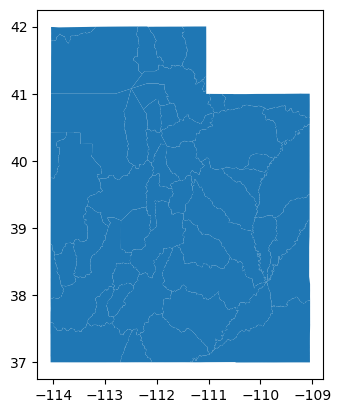

In [16]:
# plot shape info to map
gdfin1.plot()

In [17]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] = "utr1" + gdfin1['AREA_CODE'].astype(str).str.strip() # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

51


,in_ReportingUnitNativeID,geometry
0,utr185,"POLYGON ((-112.38896 37.50270, -112.38838 37.5..."
1,utr181,"POLYGON ((-114.05216 37.59699, -114.05188 37.5..."
2,utr189,"POLYGON ((-112.03554 37.73858, -112.03515 37.7..."
3,utr109,"POLYGON ((-109.30904 37.97470, -109.30856 37.9..."
4,utr173,"POLYGON ((-112.91952 38.13192, -112.91867 38.1..."


#### Regulatory Area #2 shapefile info

In [18]:
# use sampe input file as above...
gdfin2 = dfin2.copy()

gdfin2['geometry'] = gdfin2['geometry'].to_crs(epsg=4326) # Realign Geometry Projection
print(len(gdfin2))
gdfin2.head()

7


,REGIONAL_O,AREA_CODE,Office,Address,City,Phone,Link,Shape_Leng,Status,Shape_Le_1,Shape_Area,geometry,WaDEUUID
0,Logan,21,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,122055.18857,Small,1.28645,0.07148,"POLYGON ((-110.96823 40.99784, -110.89120 40.9...",re20
1,Weber,31,Weber River/Western Regional Office (SLC),"1594 West North Temple, Suite 220","SLC, Utah 84114-6300",(801) 538-7240,http://www.waterrights.utah.gov/wrinfo/policy/...,209439.55495,Small,1.68763,0.06325,"POLYGON ((-111.95861 40.90017, -111.95862 40.9...",re21
2,Logan,21,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,65411.55243,Small,0.64472,0.01169,"POLYGON ((-111.04673 41.25163, -111.04674 41.2...",re22
3,Logan,23,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,299850.11154,Small,3.06165,0.30407,"POLYGON ((-111.04676 41.99997, -111.04694 41.9...",re23
4,Logan,25,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,285776.77277,Small,3.01955,0.32789,"POLYGON ((-112.12584 41.99755, -112.10940 41.9...",re24


<Axes: >

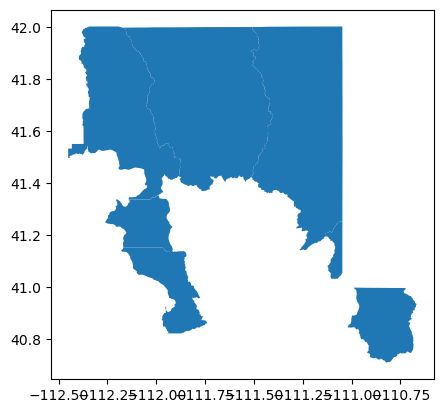

In [19]:
# plot shape info to map
gdfin2.plot()

In [20]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf2 = pd.DataFrame(columns=columnsList, index=gdfin2.index)

goutdf2['in_ReportingUnitNativeID'] = "utr2" + gdfin2['AREA_CODE'].astype(str).str.strip() # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf2['geometry'] = gdfin2['geometry']
goutdf2 = goutdf2.drop_duplicates().reset_index(drop=True)
print(len(goutdf2))
goutdf2.head()

7


,in_ReportingUnitNativeID,geometry
0,utr221,"POLYGON ((-110.96823 40.99784, -110.89120 40.9..."
1,utr231,"POLYGON ((-111.95861 40.90017, -111.95862 40.9..."
2,utr221,"POLYGON ((-111.04673 41.25163, -111.04674 41.2..."
3,utr223,"POLYGON ((-111.04676 41.99997, -111.04694 41.9..."
4,utr225,"POLYGON ((-112.12584 41.99755, -112.10940 41.9..."


#### Regulatory Area #3 shapefile info

In [21]:
# use sampe input file as above...
gdfin3 = dfin3.copy()

gdfin3['geometry'] = gdfin3['geometry'].to_crs(epsg=4326) # Realign Geometry Projection
print(len(gdfin3))
gdfin3.head()

5


,REGIONAL_O,AREA_CODE,Office,Address,City,Phone,Link,Shape_Leng,Status,Shape_Le_1,Shape_Area,geometry,WaDEUUID
0,Jordan River Basin,53,Utah Lake/Jordan River Regional Office (SLC),"1594 West North Temple, Suite 220","SLC, Utah 84114-6300",(801) 538-7240,http://www.waterrights.utah.gov/wrinfo/policy/...,258872.90020,Small,6.74573,1.02125,"POLYGON ((-111.73892 40.86117, -111.73881 40.8...",re30
1,Bear River Basin,21,Northern Regional Office (LOGAN),"1780 North Research Parkway, Suite 104","North Logan, UT 84341",(435) 752-8755,http://www.waterrights.utah.gov/wrinfo/policy/...,122055.18857,Closed,7.10444,0.90675,"MULTIPOLYGON (((-110.96823 40.99784, -110.8912...",re31
2,Davis County Basin,31,Weber River/Western Regional Office (SLC),"1594 West North Temple, Suite 220","SLC, Utah 84114-6300",(801) 538-7240,http://www.waterrights.utah.gov/wrinfo/policy/...,209439.55495,Small,1.68763,0.06325,"POLYGON ((-112.16904 41.15294, -112.12580 41.1...",re32
3,Weber River Basin,35,Weber River/Western Regional Office (SLC),"1594 West North Temple, Suite 220","SLC, Utah 84114-6300",(801) 538-7240,http://www.waterrights.utah.gov/wrinfo/policy/...,537830.32487,Closed,5.31547,0.60364,"POLYGON ((-112.13950 41.33653, -112.12576 41.3...",re33
4,,21,,,,,,0.00000,,6.40479,0.61146,"POLYGON ((-112.16904 41.15294, -112.16937 41.1...",re34


<Axes: >

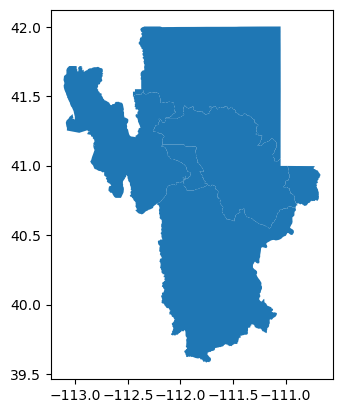

In [22]:
# plot shape info to map
gdfin3.plot()

In [23]:
# create output for Regulatory Area #1 dataframe
columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf3 = pd.DataFrame(columns=columnsList, index=gdfin3.index)

goutdf3['in_ReportingUnitNativeID'] = "utr3" + gdfin3['AREA_CODE'].astype(str).str.strip() # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf3['geometry'] = gdfin3['geometry']
goutdf3 = goutdf3.drop_duplicates().reset_index(drop=True)
print(len(goutdf3))
goutdf3.head()

5


,in_ReportingUnitNativeID,geometry
0,utr353,"POLYGON ((-111.73892 40.86117, -111.73881 40.8..."
1,utr321,"MULTIPOLYGON (((-110.96823 40.99784, -110.8912..."
2,utr331,"POLYGON ((-112.16904 41.15294, -112.12580 41.1..."
3,utr335,"POLYGON ((-112.13950 41.33653, -112.12576 41.3..."
4,utr321,"POLYGON ((-112.16904 41.15294, -112.16937 41.1..."


#### Concatenate goutdf shapefile info into single output

In [24]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1, goutdf2, goutdf3] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

63


,in_ReportingUnitNativeID,geometry
0,utr185,"POLYGON ((-112.38896 37.50270, -112.38838 37.5..."
1,utr181,"POLYGON ((-114.05216 37.59699, -114.05188 37.5..."
2,utr189,"POLYGON ((-112.03554 37.73858, -112.03515 37.7..."
3,utr109,"POLYGON ((-109.30904 37.97470, -109.30856 37.9..."
4,utr173,"POLYGON ((-112.91952 38.13192, -112.91867 38.1..."


## Export Data

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [27]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pre_utMain.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.